In [0]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
 
from numpy import savetxt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
db = load_diabetes()
X = db.data
y = db.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
print("Number of observations in X_train are:" ,len(X_train))
print("Number of observations in X_test are:" ,len(X_test))
print("Number of observations in y_train are:" ,len(y_train))
print("Number of observations in y_train are:" ,len(y_test))

Number of observations in X_train are: 331
Number of observations in X_test are: 111
Number of observations in y_train are: 331
Number of observations in y_train are: 111


In [0]:
import mlflow
print(mlflow.version.VERSION)

2.1.1


In [0]:
n_estimators = 100
max_depth = 6
max_features = 3
  
  # Create and train model
rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset
predictions = rf.predict(X_test)

In [0]:
# Enable autolog()
mlflow.sklearn.autolog()
 
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged
with mlflow.start_run():
  
  # Set the model parameters
  n_estimators = 120
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset
  predictions = rf.predict(X_test)


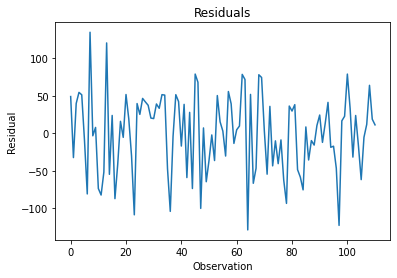

In [0]:
with mlflow.start_run():
  
  # Set the model parameters
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset
  predictions = rf.predict(X_test)
  
  # Log the model parameters used for this run
  mlflow.log_param("num_trees_log", n_estimators)
  mlflow.log_param("max_depth_log", max_depth)
  mlflow.log_param("max_feat_log", max_features)
  
  # Define a metric to use to evaluate the model
  mse = mean_squared_error(y_test, predictions)
    
  # Log the value of the metric from this run
  mlflow.log_metric("mse_log", mse)
  
  # Log the model created by this run
  mlflow.sklearn.log_model(rf, "random-forest-model") 
  
  # Save the table of predicted values
  savetxt('predictions.csv', predictions, delimiter=',')
  
  # Log the saved table as an artifact
  mlflow.log_artifact("predictions.csv")
  
  # Convert the residuals to a pandas dataframe to take advantage of graphics capabilities
  df = pd.DataFrame(data = predictions - y_test)
  
  # Create a plot of residuals
  plt.plot(df)
  plt.xlabel("Observation")
  plt.ylabel("Residual")
  plt.title("Residuals")
 
  # Save the plot and log it as an artifact
  plt.savefig("residuals_plot.png")
  mlflow.log_artifact("residuals_plot.png")

In [0]:
experiment_name = "/Shared/diabetes_experiment/"
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Make predictions
  predictions = rf.predict(X_test)
  
  # Log parameters
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Log model
  mlflow.sklearn.log_model(rf, "random-forest-model")
  
  # Create metrics
  mse = mean_squared_error(y_test, predictions)
    
  # Log metrics
  mlflow.log_metric("mse", mse)

2023/07/07 04:39:37 INFO mlflow.tracking.fluent: Experiment with name '/Shared/diabetes_experiment/' does not exist. Creating a new experiment.


In [0]:
import mlflow
 
# Set an experiment name, which must be unique and case-sensitive
experiment = mlflow.set_experiment(experiment_name)
 
# Get Experiment Details
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

In [0]:
with mlflow.start_run(experiment_id=639283598333233):
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Make predictions
  predictions = rf.predict(X_test)
  
  # Log parameters
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Log model
  mlflow.sklearn.log_model(rf, "random-forest-model")
  
  # Create metrics
  mse = mean_squared_error(y_test, predictions)
    
  # Log metrics
  mlflow.log_metric("mse", mse)